In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inp_path_dataset = "data/input/train_data-dataset"
out_path_dataset = "data/output/train_graphs-dataset"

inp_path_subset = "data/input/train_data-subset"
out_path_subset = "data/output/train_graphs-subset"

In [3]:
def load_data(paths):
    log_path, inp_path = paths
    log_data = load_log(log_path)
    inp_data = load_input(inp_path)
    return log_data, inp_data

def load_log(path):
    data = []
    with open(path, 'r') as file:
        for line in file:
            d = json.loads(line)
            data.append(d)
    return data

def load_input(path):
    with open(path, 'r') as file:
        data = json.load(file)
    return data

def data_from_log(log_data):
    data = {"train_lr" : [],
            "train_loss" : [],
            "epoch" : [],
            "test_loss" : []}
    for ld in log_data:
        for d in data:
            data[d].append(ld[d])
    return data

def graph(data_ids, legend, path = '', font_size = 14, style = "seaborn-colorblind", ydata = 'test_loss', ylabel= 'Validation Loss', add_min = False):
    with plt.style.context(style):
        fig, ax = plt.subplots(1,1)
        for i in data_ids:
            bs = 1
            if ydata == 'train_loss':
                bs = all_input_data[i]['batch_size']
            ax.plot(all_data[i]["epoch"], np.array(all_data[i][ydata])/bs)

        if add_min:
            minl = np.min([np.min(d[ydata]) for d in all_data])
            maxe = np.max([np.max(d["epoch"]) for d in all_data])
            ax.plot([0, maxe], [minl, minl], color='gray', linestyle='dashed')

        ax.set_ylabel(ylabel, fontsize=font_size)
        ax.set_xlabel('Epochs', fontsize=font_size)
        if legend:
            ax.legend(legend)
        ax.grid()
        if path:
            fig.savefig(path, bbox_inches='tight')

In [4]:
folders = os.listdir(inp_path_dataset)
data_folders = [os.path.join(inp_path_dataset, x) for x in folders]
log_paths = [os.path.join(x, "log.txt") for x in data_folders]
input_paths = [os.path.join(x, "input_log.txt") for x in data_folders]
full_paths = list(zip(log_paths, input_paths))

all_data = []
all_input_data = []
for fp in full_paths:
    log_data, inp_data = load_data(fp)
    log_data_dict = data_from_log(log_data)
    all_data.append(log_data_dict)
    all_input_data.append(inp_data)

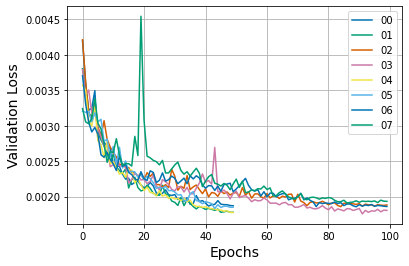

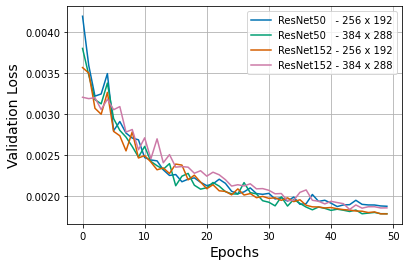

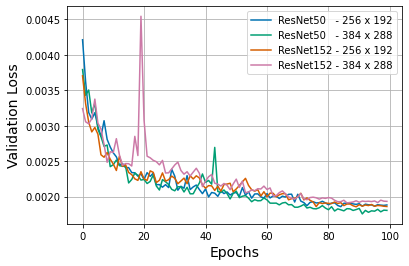

In [5]:
path = os.path.join(out_path_dataset, "all.pdf")
graph([0,1,2,3,4,5,6,7], ['00', '01', '02', '03', '04', '05', '06','07'], path=path)

path = os.path.join(out_path_dataset, "full-ep50.pdf")
graph([0,1,4,5], ['ResNet50   - 256 x 192', 'ResNet50   - 384 x 288', 'ResNet152 - 256 x 192', 'ResNet152 - 384 x 288'], path=path)

path = os.path.join(out_path_dataset, "full-ep100.pdf")
graph([2,3,6,7], ['ResNet50   - 256 x 192', 'ResNet50   - 384 x 288', 'ResNet152 - 256 x 192', 'ResNet152 - 384 x 288'], path=path)

In [6]:
folders = os.listdir(inp_path_subset)
data_folders = [os.path.join(inp_path_subset, x) for x in folders]
log_paths = [os.path.join(x, "log.txt") for x in data_folders]
input_paths = [os.path.join(x, "input_log.txt") for x in data_folders]
full_paths = list(zip(log_paths, input_paths))

all_data = []
all_input_data = []
for fp in full_paths:
    log_data, inp_data = load_data(fp)
    log_data_dict = data_from_log(log_data)
    all_data.append(log_data_dict)
    all_input_data.append(inp_data)

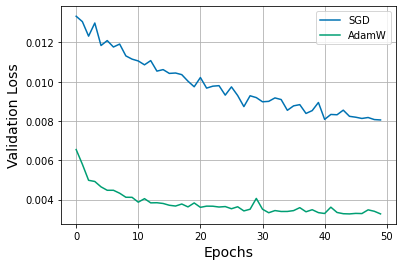

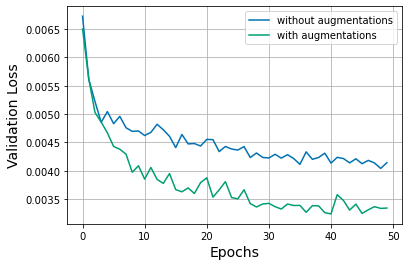

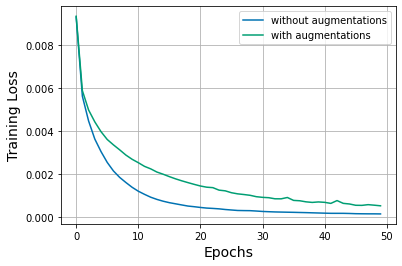

In [7]:
path = os.path.join(out_path_subset, "sgdVadam.pdf")
data_ids = [2,3]
legend = ['SGD', 'AdamW']
graph(data_ids, legend, path=path)

path = os.path.join(out_path_subset, "noaugVaug.pdf")
data_ids = [0,1]
legend = ['without augmentations', 'with augmentations']
graph(data_ids, legend, path=path)

path = os.path.join(out_path_subset, "noaugVaug_train.pdf")
data_ids = [0,1]
legend = ['without augmentations', 'with augmentations']
graph(data_ids, legend, ydata='train_loss', ylabel='Training Loss', path=path)

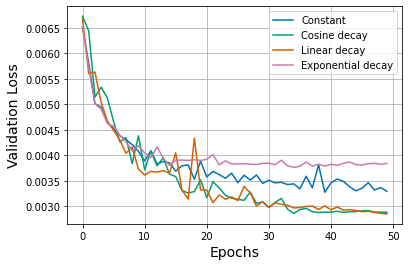

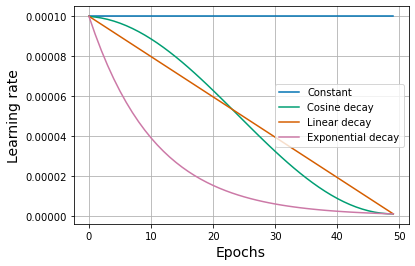

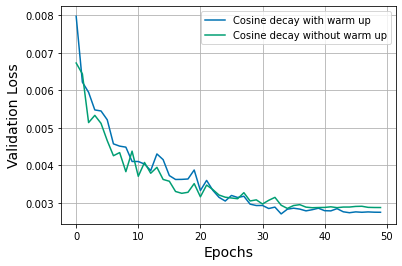

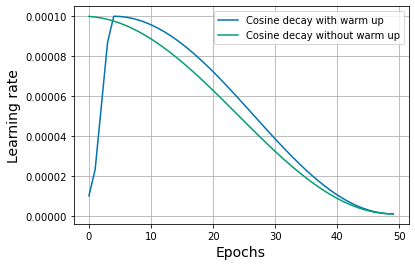

In [8]:
path = os.path.join(out_path_subset, "schd.pdf")
path_lr = os.path.join(out_path_subset, "schd_lr.pdf")
data_ids = [4,12,13,6]
legend = ['Constant', 'Cosine decay', 'Linear decay', 'Exponential decay']
graph(data_ids, legend, path=path)
graph(data_ids, legend, ydata='train_lr', ylabel= 'Learning rate', path=path_lr)

path = os.path.join(out_path_subset, "cosVcosWU.pdf")
path_lr = os.path.join(out_path_subset, "cosVcosWU_lr.pdf")
data_ids = [5, 12]
legend = ['Cosine decay with warm up', 'Cosine decay without warm up']
graph(data_ids, legend, path=path)
graph(data_ids, legend, ydata='train_lr', ylabel= 'Learning rate', path=path_lr)

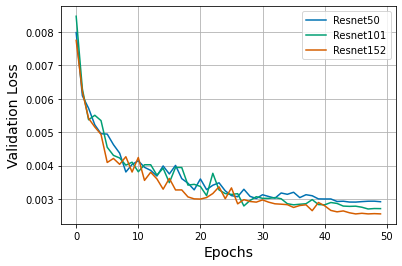

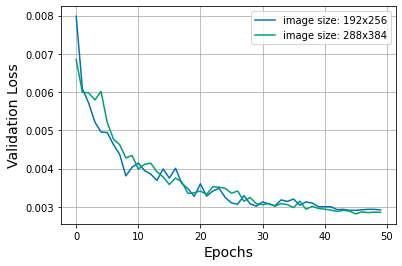

In [9]:
path = os.path.join(out_path_subset, "resnet_depth.pdf")
data_ids = [7,8,9]
legend = ['Resnet50', 'Resnet101', 'Resnet152']
graph(data_ids, legend, path=path)

path = os.path.join(out_path_subset, "img_size.pdf")
data_ids = [7, 10]
legend = ['image size: 192x256', 'image size: 288x384']
graph(data_ids, legend, path=path)

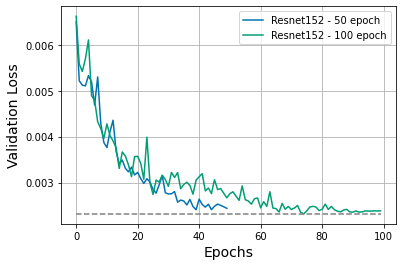

In [10]:
path = os.path.join(out_path_subset, "50epV100ep.pdf")
data_ids = [11,14]
legend = ['Resnet152 - 50 epoch', 'Resnet152 - 100 epoch']
graph(data_ids, legend, add_min=True, path=path)